In [1]:
#Question 1:
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/meenu/files/Employee.csv")
df.columns=['Company','Age','Salary','Place','Country','Gender']
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values\n{df[col].unique()}\n")
print(df.describe(include='all'))

Company: 6 unique values
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Age: 29 unique values
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Salary: 40 unique values
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

Place: 11 unique values
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Country: 1 unique values
['India']

Gender: 2 unique values
[0 1]

       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India

In [5]:
#Question 2:
import pandas as pd
import numpy as np
df_copy=df.copy()
df_copy['Age']=df_copy['Age'].replace(0,np.nan)
df_copy=df_copy.drop_duplicates()
print("Missing values before treatment:\n",df_copy.isnull().sum())
df_copy['Age']=df_copy['Age'].fillna(df_copy['Age'].median())        
df_copy['Salary']=df_copy['Salary'].fillna(df_copy['Salary'].median())  
df_copy['Place']=df_copy['Place'].fillna(df_copy['Place'].mode()[0])    
df_copy['Company']=df_copy['Company'].fillna(df_copy['Company'].mode()[0]) 
Q1=df_copy[['Age','Salary']].quantile(0.25)
Q3=df_copy[['Age','Salary']].quantile(0.75)
IQR=Q3-Q1
outliers=((df_copy[['Age','Salary']]<(Q1-1.5*IQR))|(df_copy[['Age','Salary']]>(Q3+1.5*IQR)))
print("Number of outliers:\n",outliers.sum())
print("Missing values after treatment:\n",df_copy.isnull().sum())

Missing values before treatment:
 Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64
Number of outliers:
 Age       0
Salary    0
dtype: int64
Missing values after treatment:
 Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


Filtered Data:
      Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


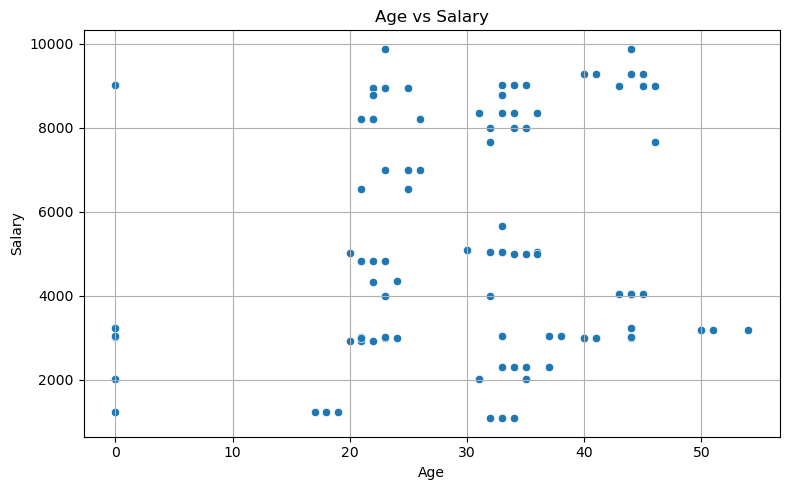

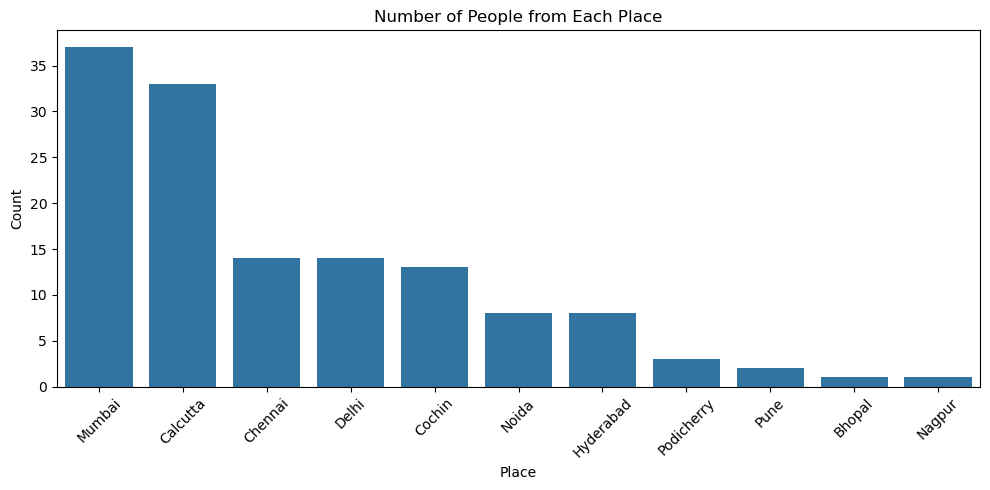

In [13]:
#Question 3:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
df=pd.read_csv("/Users/meenu/files/Employee.csv")
filtered_data=df[(df['Age']>40)&(df['Salary']<5000)]
print("Filtered Data:\n",filtered_data)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Age',y='Salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()
place_counts=df['Place'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=place_counts.index,y=place_counts.values)
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
#Question 4:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
df_encoded=df.copy()
le=LabelEncoder()
df_encoded['Gender']=le.fit_transform(df_encoded['Gender'])
df_encoded=pd.get_dummies(df_encoded,columns=['Company','Place'],drop_first=True)
if df_encoded['Country'].nunique()==1:
    df_encoded.drop('Country',axis=1,inplace=True)

In [23]:
#Question 5:
scaler_standard=StandardScaler()
scaler_minmax=MinMaxScaler()
num_cols=df_encoded.select_dtypes(include=['float64','int64']).columns
df_standard_scaled=df_encoded.copy()
df_standard_scaled[num_cols]=scaler_standard.fit_transform(df_standard_scaled[num_cols])
df_minmax_scaled=df_encoded.copy()
df_minmax_scaled[num_cols]=scaler_minmax.fit_transform(df_minmax_scaled[num_cols])
print("Standard Scaled DataFrame:\n",df_standard_scaled.head())
print("\nMinMax Scaled DataFrame:\n",df_minmax_scaled.head())

Standard Scaled DataFrame:
         Age    Salary    Gender  Company_Congnizant  Company_Infosys  \
0 -0.948501       NaN -0.535683               False            False   
1 -0.043841       NaN -0.535683               False             True   
2  0.408489 -1.175200 -0.535683               False            False   
3  0.860819 -0.902122 -0.535683               False             True   
4 -0.677103 -0.512010 -0.535683               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  Place_Hyd